# Estadística con Python

## Introducción a Pandas

### GitHub repository: https://github.com/jorgemauricio/python_statistics

### Instructor: Jorge Mauricio

### Base de datos: Stanford Open Policing Project ([Montana](https://openpolicing.stanford.edu/data)) 

In [63]:
# librerías
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
# leer csv
df = pd.read_csv("data/Montana.csv", low_memory=False)

In [65]:
# estructura del dataFrame Montana
df.head()

,raw_row_number,date,time,location,lat,lng,county_name,subject_age,subject_race,subject_sex,...,reason_for_stop,vehicle_make,vehicle_model,vehicle_type,vehicle_registration_state,vehicle_year,raw_Race,raw_Ethnicity,raw_SearchType,raw_search_basis
0,1,2009-01-01,02:10:53,US 89 N MM10 (SB),47.572738,-111.802932,Cascade County,16.0,white,female,...,--- - HIT AND RUN,FORD,EXPLORER,SPORT UTILITY,MT,1994.0,W,N,NO SEARCH REQUESTED,NaN
1,2,2009-01-02,11:34:19,HWY 93 SO AND ANNS LANE S/B,46.761225,-114.081142,Missoula County,19.0,white,male,...,EXPIRED TAG ( - MONTHS OR LESS ),GMC,TK,TRUCK,MT,1996.0,W,N,NO SEARCH REQUESTED,NaN
2,3,2009-01-03,11:36:42,P007 HWY 93 MM 77 N/B,46.694683,-114.073505,Missoula County,17.0,white,male,...,SPEED,GMC,YUKON,SPORT UTILITY,MT,1999.0,W,N,NO SEARCH REQUESTED,NaN
3,4,2009-01-04,10:33:11,P007 HWY 93 MM 81 S/B,46.727388,-114.079027,Missoula County,17.0,NaN,female,...,SPEED,HOND,CR-V,SPORT UTILITY,MT,2002.0,W,NaN,NaN,NaN
4,5,2009-01-04,10:46:43,P007 HWY 93 MM 81 N/B,46.729518,-114.079150,Missoula County,31.0,NaN,male,...,SPEED,TOYT,TERCEL,SEDAN,MT,1992.0,I,NaN,NaN,NaN


In [66]:
# cantidad de columnas y filas
df.shape

(921228, 30)

In [67]:
# tipos de datos de cada columna
df.dtypes

raw_row_number                 object
date                           object
time                           object
location                       object
lat                           float64
lng                           float64
county_name                    object
subject_age                   float64
subject_race                   object
subject_sex                    object
department_name                object
type                           object
violation                      object
arrest_made                      bool
citation_issued                  bool
warning_issued                   bool
outcome                        object
frisk_performed                object
search_conducted                 bool
search_basis                   object
reason_for_stop                object
vehicle_make                   object
vehicle_model                  object
vehicle_type                   object
vehicle_registration_state     object
vehicle_year                  float64
raw_Race    

In [68]:
# contabilizar los valores nulos
df.isnull().sum()

raw_row_number                     0
date                              12
time                              12
location                        3304
lat                              436
lng                              436
county_name                        4
subject_age                     3813
subject_race                     106
subject_sex                      119
department_name                    0
type                               0
violation                         73
arrest_made                        0
citation_issued                    0
warning_issued                     0
outcome                          270
frisk_performed                   94
search_conducted                   0
search_basis                  917635
reason_for_stop                   11
vehicle_make                    4520
vehicle_model                  25009
vehicle_type                   67271
vehicle_registration_state     34411
vehicle_year                    8442
raw_Race                           8
r

## Remover columnas que solo contienen valores nulos

In [41]:
# eliminar la columna de "police_department"
# df.drop("search_basis", axis="columns", inplace=True)

In [42]:
# contabilizar columnas y filas
#df.shape

(921228, 29)

In [43]:
# checar columnas
# df.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng',
       'county_name', 'subject_age', 'subject_race', 'subject_sex',
       'department_name', 'type', 'violation', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'frisk_performed',
       'search_conducted', 'reason_for_stop', 'vehicle_make', 'vehicle_model',
       'vehicle_type', 'vehicle_registration_state', 'vehicle_year',
       'raw_Race', 'raw_Ethnicity', 'raw_SearchType', 'raw_search_basis'],
      dtype='object')

In [14]:
# método alternativo
# df.dropna(axis='columns', how='all').shape

(921228, 29)

NOTA: 
- Existe más de una forma de eliminar datos nulos
- Verificar los argumentos de cada método

## ¿Qué genero es detenido más por exceso de velocidad?

In [69]:
# Número de mujeres y hombres que son detenidos por exceso de velocidad
df[df["violation"] == 'SPEED']["subject_sex"].value_counts()

male      17
female    12
Name: subject_sex, dtype: int64

In [70]:
# Porcentaje de mujeres y hombres que son detenidos por exceso de velocidad
df[df["violation"] == 'SPEED']["subject_sex"].value_counts(normalize=True)

male      0.586207
female    0.413793
Name: subject_sex, dtype: float64

In [71]:
# forma alternativa
df.loc[df["violation"] == 'SPEED', "subject_sex"].value_counts(normalize=True)

male      0.586207
female    0.413793
Name: subject_sex, dtype: float64

In [72]:
# cuando un hombre es detenido, que porcentaje es por exceso de velocidad?
df[df['subject_sex'] == "male"]["violation"].value_counts(normalize=True)

111 - SPEED OVER LEGAL                                                                          0.387696
111 - SPEED OVER LEGAL|240 - INSURANCE                                                          0.052461
160 - LIGHT VIOLATIONS                                                                          0.046338
111 - SPEED OVER LEGAL|206 - VEHICLE LICENSE                                                    0.029783
111 - SPEED OVER LEGAL|202 - DRIVERS LICENSE                                                    0.022990
                                                                                                  ...   
125 - DRIVING OVER CENTERLINE|111 - SPEED OVER LEGAL|207 - DISPLAYING ONLY ONE LICENSE PLATE    0.000002
296 - OTHER|113 - OPEN CONTAINER|265 - ILLEGAL POSSESSION OF LIQUOR                             0.000002
140 - IMPROPER TURN|113 - OPEN CONTAINER                                                        0.000002
202 - DRIVERS LICENSE|206 - VEHICLE LICENSE|125 - DRIVI

In [73]:
# cuando una mujer es detenida, que porcentaje es por exceso de velocidad?
df[df['subject_sex'] == "female"]["violation"].value_counts(normalize=True)

111 - SPEED OVER LEGAL                                                                  0.407109
111 - SPEED OVER LEGAL|240 - INSURANCE                                                  0.060781
160 - LIGHT VIOLATIONS                                                                  0.051146
111 - SPEED OVER LEGAL|206 - VEHICLE LICENSE                                            0.034169
111 - SPEED OVER LEGAL|202 - DRIVERS LICENSE                                            0.031757
                                                                                          ...   
212 - THROWING LIGHTED MATERIALS|182 - SEATBELT|206 - VEHICLE LICENSE                   0.000003
296 - OTHER|182 - SEATBELT|115 - RIGHT OF WAY                                           0.000003
210 - THROWING DEBRIS|206 - VEHICLE LICENSE|202 - DRIVERS LICENSE                       0.000003
145 - FAIL TO STOP - SIGN OR LIGHT|145 - FAIL TO STOP - SIGN OR LIGHT|182 - SEATBELT    0.000003
296 - OTHER|282 - DRUGS|104 - 

In [74]:
# porcentaje agrupado por genero
df.groupby("subject_sex")["violation"].value_counts(normalize=True)

subject_sex  violation                                                  
female       111 - SPEED OVER LEGAL                                         0.407109
             111 - SPEED OVER LEGAL|240 - INSURANCE                         0.060781
             160 - LIGHT VIOLATIONS                                         0.051146
             111 - SPEED OVER LEGAL|206 - VEHICLE LICENSE                   0.034169
             111 - SPEED OVER LEGAL|202 - DRIVERS LICENSE                   0.031757
                                                                              ...   
male         SPEED|SEATBELT ( DRIVER )                                      0.000002
             SPEED|SEATBELT ( DRIVER )|NO REGISTRATION                      0.000002
             SPEED|SEATBELT ( DRIVER )|OTHER TAG/REGISTRATION VIOLATIONS    0.000002
             VIOLATION OF DRIVERS LICENSE RESTRICTIONS                      0.000002
             VIOLATIONS OF TRAFFIC CONTROL DEVICE                           0

In [75]:
# año con el número mayor de detenciones
df.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng',
       'county_name', 'subject_age', 'subject_race', 'subject_sex',
       'department_name', 'type', 'violation', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'frisk_performed',
       'search_conducted', 'search_basis', 'reason_for_stop', 'vehicle_make',
       'vehicle_model', 'vehicle_type', 'vehicle_registration_state',
       'vehicle_year', 'raw_Race', 'raw_Ethnicity', 'raw_SearchType',
       'raw_search_basis'],
      dtype='object')

In [76]:
# combinar celdas de fecha y tiempo
combined = df["date"] + " " + df['time']

In [77]:
# convertir a columna de tiempo
df['fecha'] = pd.to_datetime(combined)

In [78]:
# corroborar tipo de dato de la columna
df.dtypes

raw_row_number                        object
date                                  object
time                                  object
location                              object
lat                                  float64
lng                                  float64
county_name                           object
subject_age                          float64
subject_race                          object
subject_sex                           object
department_name                       object
type                                  object
violation                             object
arrest_made                             bool
citation_issued                         bool
warning_issued                          bool
outcome                               object
frisk_performed                       object
search_conducted                        bool
search_basis                          object
reason_for_stop                       object
vehicle_make                          object
vehicle_mo

In [79]:
# año con mayor número de detenciones
df['fecha'].dt.year.value_counts()

2010.0    124285
2011.0    122839
2012.0    117484
2015.0    115927
2013.0    114279
2014.0    109743
2016.0    102091
2017.0     96134
2009.0     18434
Name: fecha, dtype: int64

In [80]:
# mes con mayor número de detenciones del 2010
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts()

9     13137
8     12421
7     12271
5     11953
10    11791
3     10650
6     10568
4     10279
2      9084
11     7882
1      7321
12     6928
Name: fecha, dtype: int64

In [81]:
# ordenar datos por índice
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index()

1      7321
2      9084
3     10650
4     10279
5     11953
6     10568
7     12271
8     12421
9     13137
10    11791
11     7882
12     6928
Name: fecha, dtype: int64

<Axes: >

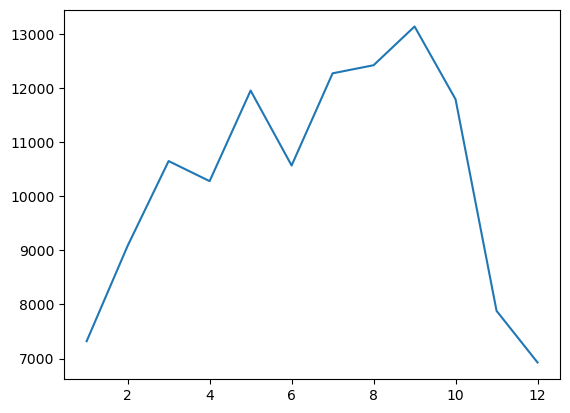

In [82]:
# gráficar los datos (línea)
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index().plot()

<Axes: >

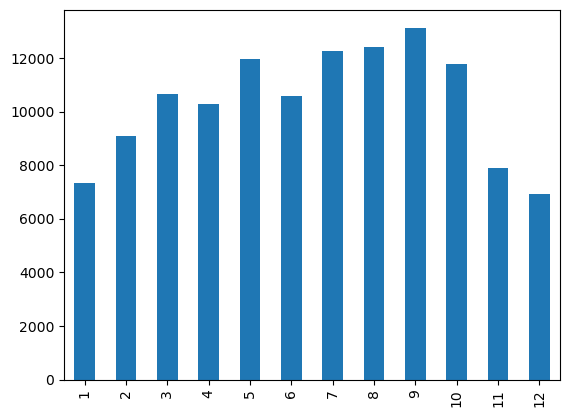

In [83]:
# gráficar los datos (barra)
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index().plot(kind="bar")

<Axes: >

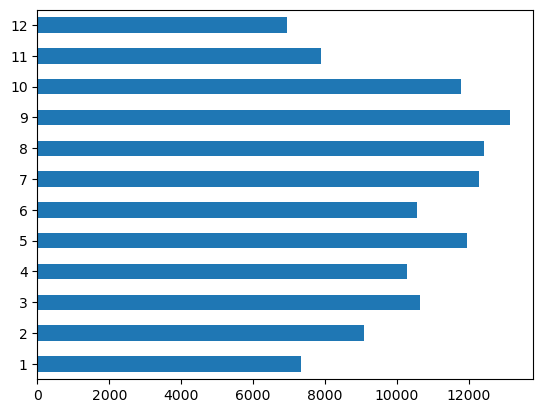

In [84]:
# gráficar los datos (barra horizontal)
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index().plot(kind="barh")

<Axes: >

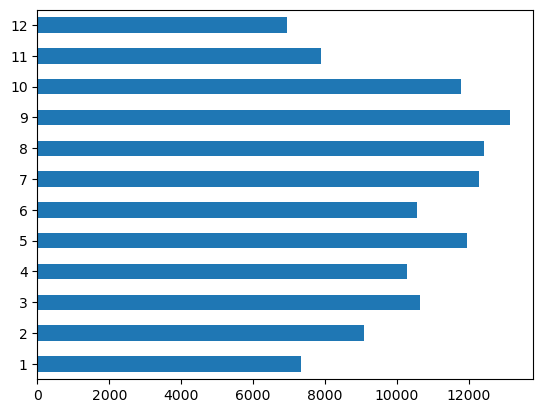

In [85]:
# aplicando estilo
# gráficar los datos (barra horizontal)
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index().plot(kind="barh")

<Axes: title={'center': 'Detenciones 2010'}>

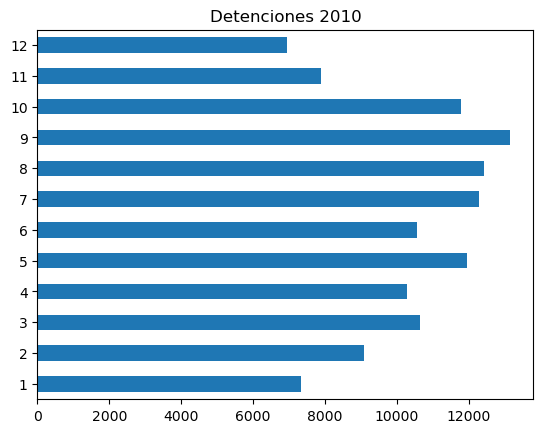

In [86]:
# gráficar los datos (barra y título)
df[df['fecha'].dt.year == 2010]['fecha'].dt.month.value_counts().sort_index().plot(kind="barh", title="Detenciones 2010")

<Axes: >

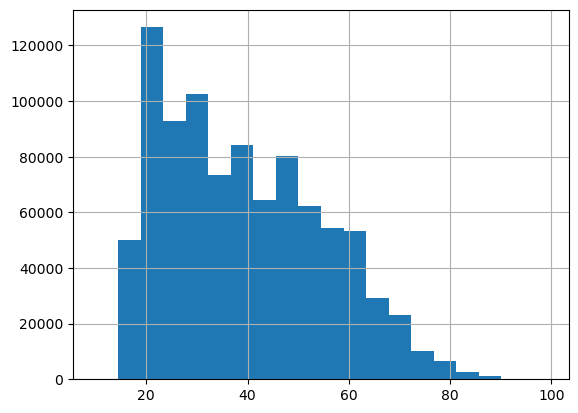

In [88]:
# histograma de edades
df['subject_age'].hist(bins=20)